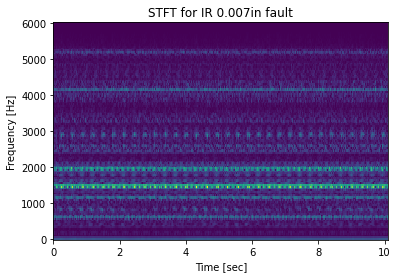

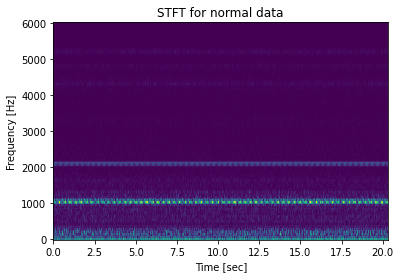

Inner Race 0.007in fault


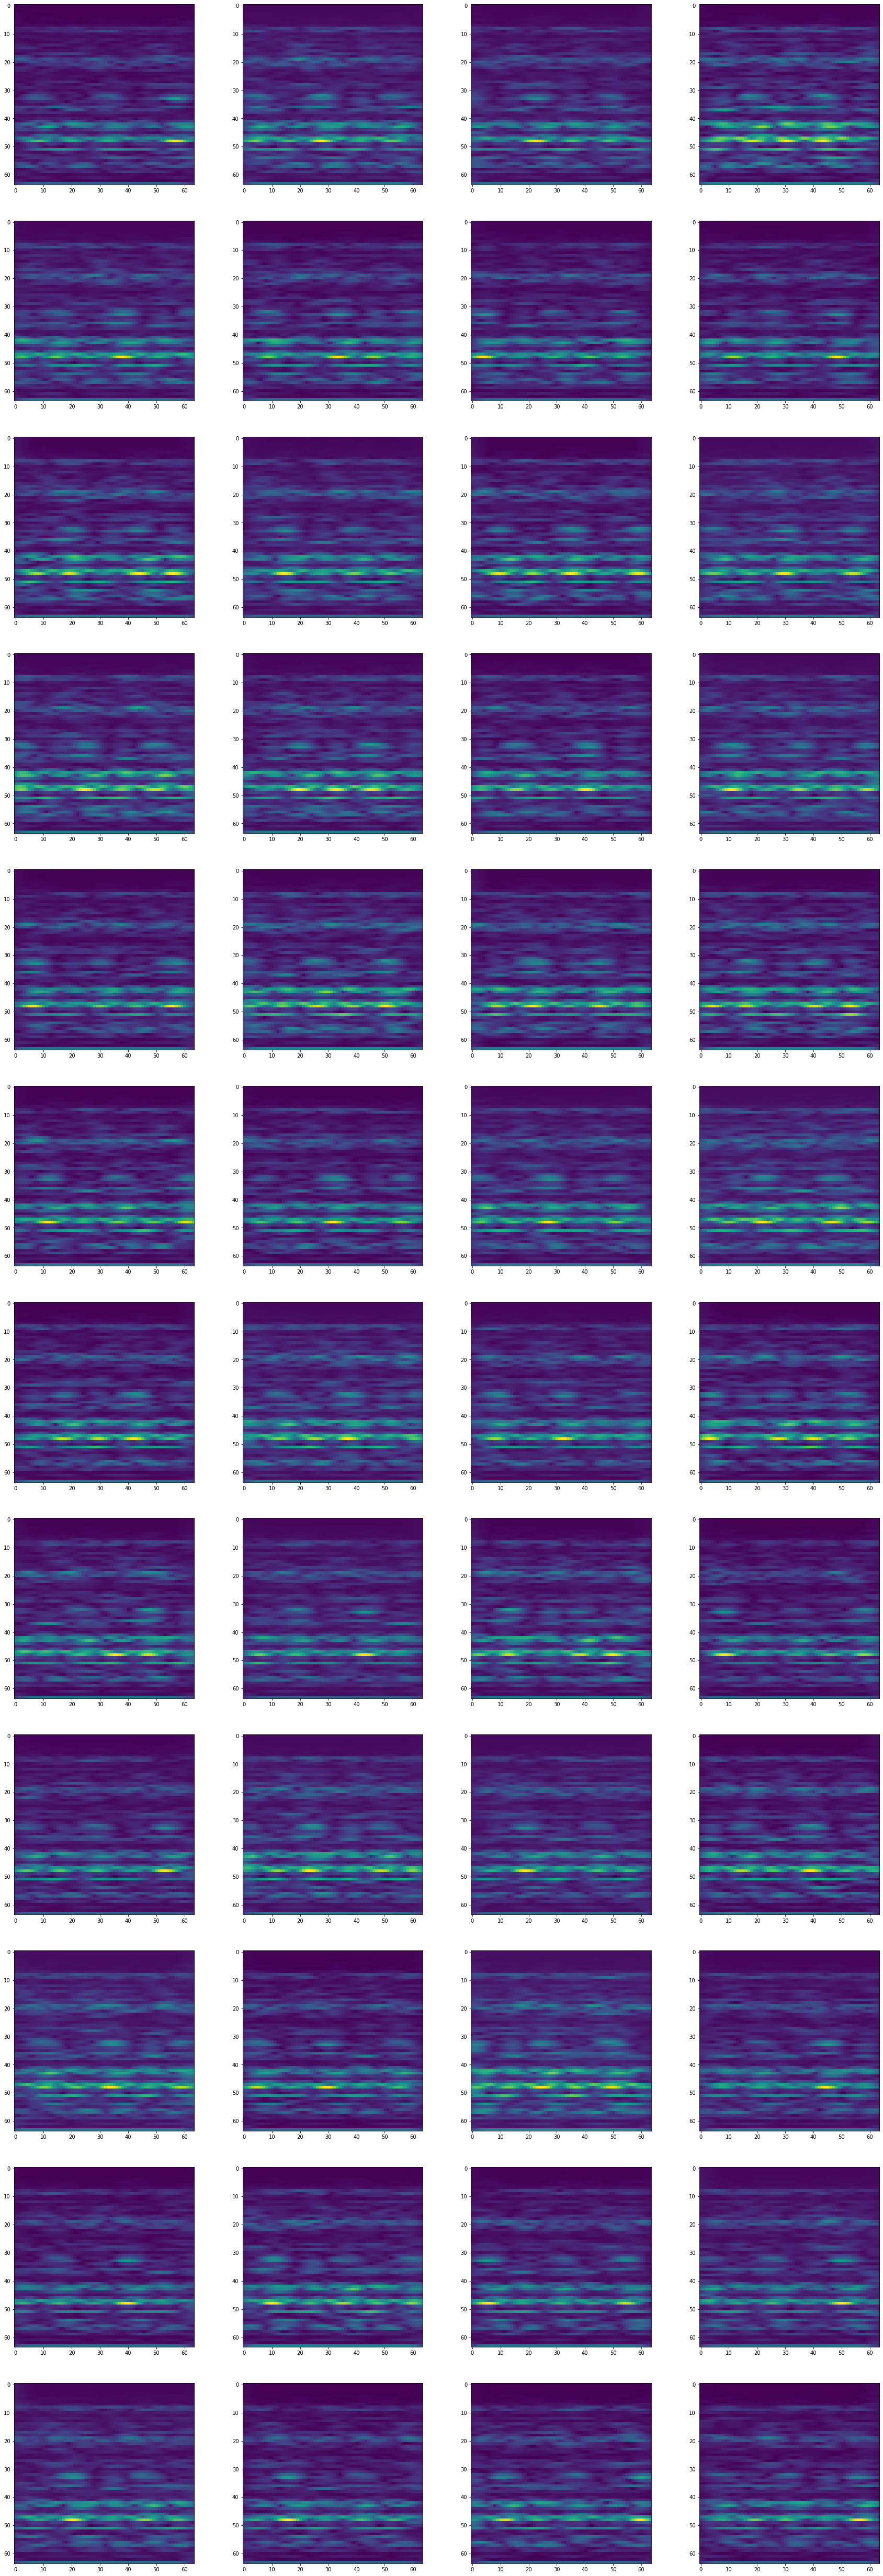

Normal data


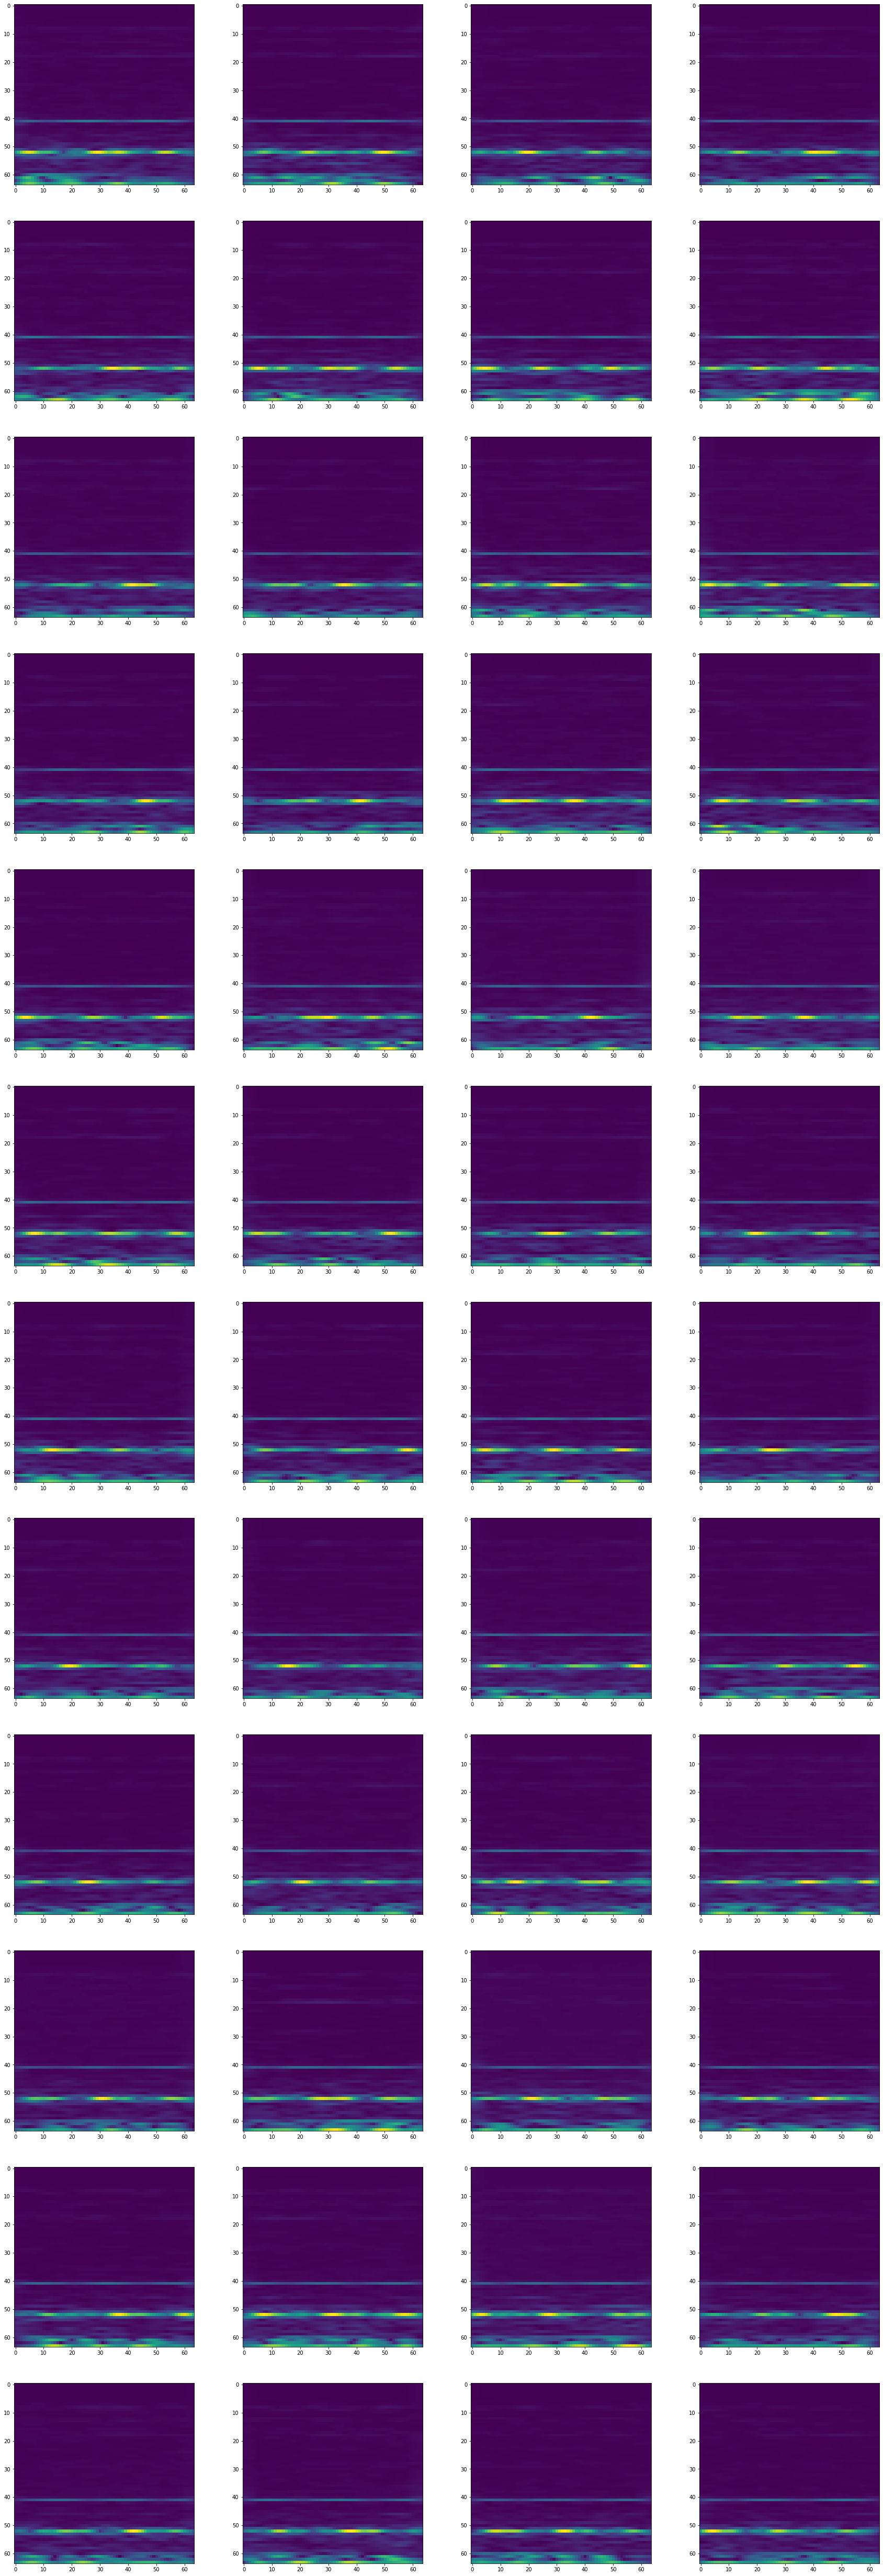

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

from scipy.io import loadmat
from scipy.signal import stft

from scipy import ndimage, misc

def Normalize(arr : np.array) -> np.array:
    return (arr-np.min(arr))/(np.max(arr)-np.min(arr))

def ScaleToSquare(arr: np.ndarray, size: int) -> np.ndarray:
    return ndimage.zoom(arr, (size/arr.shape[0],size/arr.shape[1]))


normal = loadmat('../Datasets/A/None/97.mat')
ir_fault = loadmat('../Datasets/B/IR/0.007/105.mat')
assert(len(ir_fault['X105_DE_time']) == 121265)  # ok, I use the same data, as in 4.2 section
ir_fault_data = ir_fault['X105_FE_time'].ravel()
normal_data = normal['X097_FE_time'].ravel()

Nw = 256  # window width from 4.3 section
No = 250  # window overlap from 4.3 section
fs = 12000. # 12KHz

f_ir7,t_ir7,Zxx_ir7 = stft(ir_fault_data,fs,window='hann',nperseg=Nw,noverlap=No)
#Zxx_ir7 = Normalize(np.abs(Zxx_ir7))
plt.pcolormesh(t_ir7, f_ir7, Normalize(np.abs(Zxx_ir7)))
plt.title('STFT for IR 0.007in fault')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f_none,t_none,Zxx_none = stft(normal_data,fs,window='hann',nperseg=Nw,noverlap=No)
#Zxx_none = Normalize(np.abs(Zxx_none))

plt.pcolormesh(t_none, f_none, Normalize(np.abs(Zxx_none)))
plt.title('STFT for normal data')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

step = 1280;
size = 1024;
cols = 4
#rows = (len(ir_fault_data))//step
rows = 12
print('Inner Race 0.007in fault')
plt.figure(figsize=(30, 90))
for i in range(1,rows*cols*step+1,step):
    ir_pack_data = ir_fault_data[i:i+size]
    f_ir7, t_ir7, Zxx_ir7 = stft(ir_pack_data, fs, window = 'hann', nperseg = Nw, noverlap = No)
    scaled_ir7 = ScaleToSquare(np.abs(Zxx_ir7), 64)
    scaled_ir7 = Normalize(scaled_ir7)
    plt.subplot(rows, cols, (i-1)//step+1)
    plt.imshow(scaled_ir7[::-1])
plt.show()

print('Normal data')
plt.figure(figsize=(30, 90))
for i in range(1,rows*cols*step+1,step):
    normal_pack_data = normal_data[i:i+size]
    f_none, t_none, Zxx_none = stft(normal_pack_data, fs, window = 'hann', nperseg = Nw, noverlap = No)
    scaled_none = ScaleToSquare(np.abs(Zxx_none), 64)
    scaled_none = Normalize(scaled_none)
    plt.subplot(rows, cols, (i-1)//step+1)
    plt.imshow(scaled_none[::-1])
plt.show()


# print(scaled_ir7, np.min(scaled_ir7), np.max(scaled_ir7))
# print(scaled_none, np.min(scaled_none), np.max(scaled_none))


